Описание задания:  
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.  
Этапы работы:   
1. Сгенерируйте данные с помощью кода:  
from sklearn.datasets import make_classification  
x_data_generated, y_data_generated = make_classification(scale=1)  
2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:  
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()  
3. Используйте статистические методы для отбора признаков:  
a) Выберите признаки на основе матрицы корреляции.  
b) Отсеките низковариативные признаки (VarianceThreshold).   
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.   
4. Осуществите отбор признаков на основе дисперсионного анализа:  
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).  
b) Повторите п. 2 на отобранных признаках.  
5. Отбор с использованием моделей:  
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.  
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.  
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.  
6. Перебор признаков:   
a) SequentialFeatureSelector.   
b) Повторите п. 2 на отобранных признаках.   
7. Сформулируйте выводы по проделанной работе:   
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:
import pandas as pd

from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

df = pd.DataFrame(x_data_generated)
df['target'] = y_data_generated
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.253093,0.084649,0.358231,-0.972582,-1.164244,-0.112487,-0.797658,-0.741694,0.174273,0.483852,...,0.172320,-0.086462,1.136272,1.155127,-0.394212,-0.425011,-0.932025,2.860088,0.384381,0
1,-1.009531,-0.322279,0.605494,1.272424,0.815976,0.604834,-1.741587,1.788576,-1.359628,0.111451,...,1.237474,-0.114654,1.347606,0.125119,-0.959144,0.119187,0.499508,0.587507,-0.209412,0
2,-1.658430,-3.552930,-2.777827,0.294275,0.987022,0.391749,1.088000,0.468020,-0.548643,-1.107599,...,-0.275409,-0.972857,1.328633,-0.575616,1.234138,-0.664475,0.880723,-0.491212,-1.530770,0
3,0.096941,-0.878117,-1.192411,-0.390702,0.254824,-0.483036,0.918553,-0.934349,-1.001818,-0.261726,...,0.826746,-0.102872,0.448859,0.130795,0.936912,2.515989,-0.900105,-1.143547,-1.733317,0
4,-0.594351,-1.120714,-0.805131,-0.524826,0.125196,-0.620569,0.452303,-0.518074,-0.136390,-0.717636,...,-0.123026,0.004383,0.326083,-0.647890,0.300488,-0.443232,-0.163250,1.915820,-0.472332,0
5,-1.168251,-0.645266,0.360910,0.349583,0.865510,-0.795985,-1.184697,0.903952,-0.087497,-0.154739,...,0.952789,0.411678,0.509675,0.131844,-0.856872,-0.392782,-0.464776,0.808347,1.073369,0
6,-0.899723,-0.177398,0.676666,1.054406,-0.031188,0.271501,0.343480,0.477435,0.339902,0.647927,...,1.392533,-0.660316,-0.142584,-1.038852,-0.956879,-0.447089,0.272490,-0.087736,-0.922503,1
7,1.547692,1.792666,0.692018,0.740256,0.651170,0.176553,1.146328,-0.067512,1.188851,-0.596930,...,1.097803,-0.529776,0.532131,-1.011180,0.263644,1.542903,1.593266,-0.003094,-0.539947,1
8,-0.018175,-2.409846,-2.988700,0.722539,-0.650996,-0.106180,0.892121,-0.472519,-2.313537,0.765894,...,-0.797045,1.559118,0.563544,0.960856,2.216855,1.481488,0.823611,-1.783153,-1.095269,0
9,4.014448,2.148228,-1.326400,0.543996,0.554714,-0.380925,1.389733,-1.066530,0.268808,-0.828180,...,0.995414,0.240909,-0.059367,0.695427,3.008668,0.041683,-0.386459,-0.330013,1.810289,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Преобразуем названия столбцов в строки
df.columns = df.columns.astype(str)

x = df.drop(columns='target')
y = df['target']

accuracy = cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy:.2f}')

средняя точность:0.85


Отбор признаков через статистический метод.

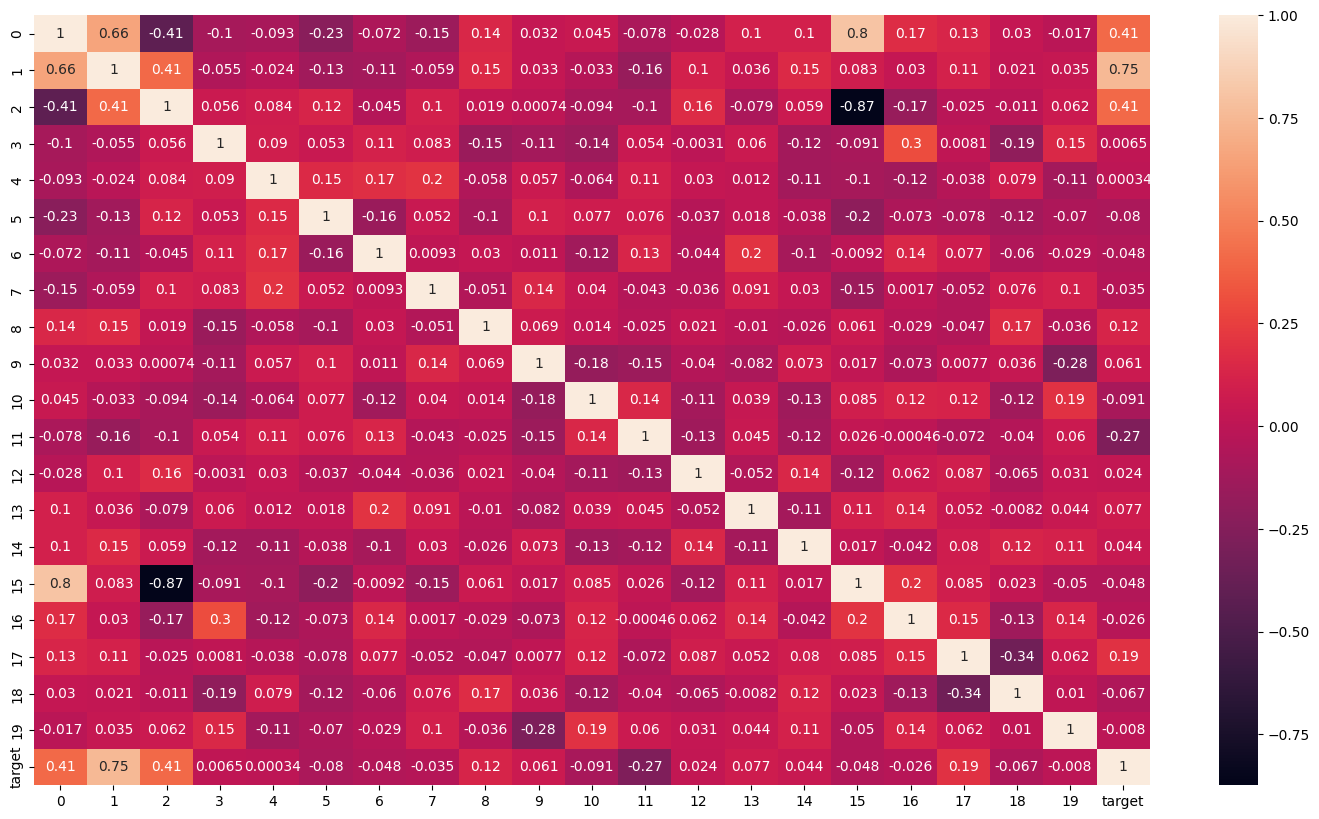

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap (df.corr(), annot=True)
plt.show()

In [ ]:
import numpy as np

correlation = df.corr()['target'].abs()

# Сортируем корреляции по абсолютному значению и выбираем первые 5
top_corr = correlation.sort_values(ascending=False)[1:].head(5)

# Получаем индексы выбранных признаков
selected_features = top_corr.index

# Создаем массив признаков с выбранными признаками
x_top = x[selected_features]

print(top_corr)

1     0.754934
0     0.413346
2     0.412320
11    0.266518
17    0.191465
Name: target, dtype: float64


In [ ]:

accuracy1 = cross_val_score(LogisticRegression(), x_top, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy1:.2f}')

средняя точность:0.91


Отбор признаков через диперсионный анализ.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=5)

x_select = selector.fit_transform(x, y)

feature = selector.get_feature_names_out()

print(feature)

['0' '1' '2' '11' '17']


In [ ]:

accuracy_SelectKBest = cross_val_score(LogisticRegression(), x_select, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy_SelectKBest:.2f}')

средняя точность:0.91


Отбор признаков с использованием моделей.

Логистическая регрессия с L1 регуляризацией.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

estimator = LogisticRegression(penalty='l1', solver='liblinear')

selector1 = SelectFromModel(estimator=estimator, max_features=5)

x_select1 = StandardScaler().fit_transform(x)

selector1.fit(x_select1, y)

feature1 = selector1.get_feature_names_out()

print(feature1)

['x1' 'x2' 'x9' 'x10' 'x17']


In [ ]:

x_selected = selector1.transform(x_select1)

accuracy_SelectFromModel = cross_val_score(estimator, x_selected, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy_SelectFromModel:.2f}')

средняя точность:0.90


Случайный лес с параметром feature_impotance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

selector2 = RandomForestClassifier(random_state=1)

selector2.fit(x, y)

importance = selector2.feature_importances_

imp = pd.Series(importance, index=x.columns)

top_features = imp.sort_values(ascending=False).head(5)

print(top_features)

1     0.319707
2     0.115541
0     0.113452
17    0.047212
15    0.041984
dtype: float64


In [ ]:

x_select3 = x[top_features.index]

accuracy_RandomForestClassifier = cross_val_score(estimator, x_select3, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy_RandomForestClassifier:.2f}')

средняя точность:0.89


Перебор признаков SequentialFeatureSelector.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

estimator1 = LogisticRegression(penalty='l1', solver='liblinear')

selector3 = SequentialFeatureSelector(estimator, n_features_to_select=5, direction="forward")

x_select2 = selector3.fit_transform(x, y)

feature2 = selector3.get_feature_names_out()

print(feature2)

['1' '7' '8' '11' '17']


In [ ]:

accuracy_SequentialFeatureSelector = cross_val_score(estimator1, x_select2, y, scoring='accuracy').mean()
print(f'средняя точность:{accuracy_SequentialFeatureSelector:.2f}')

средняя точность:0.92


Сделаем таблицу сравнения точности методов и выбранных 5 важных признаков, преобразовав признаки в строки.

In [ ]:

select_KBest = [str(feature) for feature in feature]
select_model = [str(feature).replace('x',' ') for feature in feature1]
sequential_feature = [str(feature) for feature in feature2]
random_forest = [str(feature) for feature in top_features.index]
correllace = [str(feature) for feature in x_top]

data = {
    'способ выбора признаков':['SelectKBest', 'SelectFromModel', 'SequentialFeatureSelector', 'RandomForestClassifier', 'матрица корреляции'],
    'средняя точность модели':[
        accuracy_SelectKBest,
        accuracy_SelectFromModel,
        accuracy_SequentialFeatureSelector,
        accuracy_RandomForestClassifier,
        accuracy1],
    '5 важных признаков':[
        select_KBest,
        select_model,
        sequential_feature,
        random_forest, correllace
        ]
}

table = pd.DataFrame(data)
table

,способ выбора признаков,средняя точность модели,5 важных признаков
0,SelectKBest,0.91,"[0, 1, 2, 11, 17]"
1,SelectFromModel,0.90,"[ 1, 2, 9, 10, 17]"
2,SequentialFeatureSelector,0.92,"[1, 7, 8, 11, 17]"
3,RandomForestClassifier,0.89,"[1, 2, 0, 17, 15]"
4,матрица корреляции,0.91,"[1, 0, 2, 11, 17]"
